# 🎯 Customer Churn Prediction - Machine Learning Pipeline

## Project Overview
This notebook implements a comprehensive machine learning pipeline to predict customer churn in the telecommunications industry. We'll build, evaluate, and optimize multiple models to identify customers at risk of leaving the service.

### 🎯 Business Objective
- **Goal**: Predict which customers will churn (leave the service)
- **Business Value**: Enable proactive retention strategies and reduce customer acquisition costs
- **Success Metric**: High recall to capture maximum potential churners

### 📊 Dataset
- **Source**: Telco Customer Churn Dataset
- **Size**: 7,032 customers with 50+ features
- **Challenge**: Class imbalance (73% No Churn, 27% Churn)

### 🔄 Pipeline Overview
1. **Data Loading & Exploration**
2. **Feature Engineering & Preprocessing**
3. **Class Imbalance Handling**
4. **Multiple Model Training & Evaluation**
5. **Hyperparameter Tuning**
6. **Threshold Optimization**
7. **Model Persistence & Deployment**

---


## 📦 Step 1: Import Required Libraries

First, we'll import all the necessary libraries for our machine learning pipeline including:
- **Data Manipulation**: Pandas, NumPy
- **Visualization**: Matplotlib, Seaborn
- **Machine Learning**: Scikit-learn, XGBoost, LightGBM
- **Class Imbalance**: Imbalanced-learn
- **Model Evaluation**: Classification metrics


In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


## 🔧 Step 2: Install Required Packages

We need to install the imbalanced-learn library for handling class imbalance using techniques like SMOTE.


In [ ]:
!pip install imblearn

## 📊 Step 3: Load and Explore the Dataset

Load the preprocessed dataset and examine its structure. This dataset has already been processed with feature engineering and one-hot encoding from the original Telco dataset.


In [2]:
df= pd.read_csv('tel_churn.csv')

## 🔍 Step 4: Examine Dataset Structure

Let's look at the first few rows to understand the data structure and feature names.


In [3]:
df.head(5)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


## 🧹 Step 5: Data Cleaning

Remove the unnamed index column that was created during data export.


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## ✅ Step 6: Verify Clean Data

Check the cleaned dataset structure after removing the index column.


In [5]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


## 🎯 Step 7: Prepare Features and Target Variable

Separate the features (X) from the target variable (Churn). The target variable is binary: 0 = No Churn, 1 = Churn.


In [6]:
x = df.drop('Churn', axis=1)
print(x)

      SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85           True        False   
1                 0           56.95       1889.50          False         True   
2                 0           53.85        108.15          False         True   
3                 0           42.30       1840.75          False         True   
4                 0           70.70        151.65           True        False   
...             ...             ...           ...            ...          ...   
7027              0           84.80       1990.50          False         True   
7028              0          103.20       7362.90           True        False   
7029              0           29.60        346.45           True        False   
7030              1           74.40        306.60          False         True   
7031              0          105.65       6844.50          False         True   

      Partner_No  Partner_Y

## 📋 Step 8: Examine Target Variable Distribution

Check the distribution of our target variable to understand the class balance in our dataset.


In [7]:
Y = df['Churn']
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64


## 🔧 Step 9: Install Advanced ML Libraries

Install LightGBM for advanced gradient boosting algorithms.


In [9]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00a 0:00:01


## 📚 Step 10: Import Comprehensive ML Libraries

Import all necessary libraries for our complete machine learning pipeline including:
- **Advanced Models**: XGBoost, LightGBM
- **Model Selection**: Cross-validation, Grid Search
- **Metrics**: Comprehensive evaluation metrics
- **Preprocessing**: SMOTE for class imbalance
- **Visualization**: Plotting capabilities


In [10]:
# Import additional libraries for comprehensive ML pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


## 📊 Step 11: Load and Analyze Dataset

Load the processed dataset and perform initial analysis to understand:
- Dataset dimensions
- Class distribution and imbalance ratio
- Data quality (missing values)
- Feature overview


In [11]:
# Load the processed data from EDA
df = pd.read_csv('tel_churn.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

print("Dataset shape:", df.shape)
print("\nTarget variable distribution:")
print(df['Churn'].value_counts())
print(f"\nClass imbalance ratio: {df['Churn'].value_counts()[0] / df['Churn'].value_counts()[1]:.2f}:1")

# Display first few rows
df.head()


Dataset shape: (7032, 51)

Target variable distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Class imbalance ratio: 2.76:1


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


## 🔧 Step 12: Feature Engineering and Data Preparation

Prepare the dataset for machine learning by:
- Separating features (X) and target variable (y)
- Checking for missing values
- Displaying all feature names for reference


In [12]:
# Feature Engineering and Data Preparation
print("=== DATA PREPARATION ===")

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check for any missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Display feature names
print(f"\nFeatures ({len(X.columns)}):")
for i, col in enumerate(X.columns):
    print(f"{i+1:2d}. {col}")


=== DATA PREPARATION ===
Features shape: (7032, 50)
Target shape: (7032,)

Missing values in features: 0
Missing values in target: 0

Features (50):
 1. SeniorCitizen
 2. MonthlyCharges
 3. TotalCharges
 4. gender_Female
 5. gender_Male
 6. Partner_No
 7. Partner_Yes
 8. Dependents_No
 9. Dependents_Yes
10. PhoneService_No
11. PhoneService_Yes
12. MultipleLines_No
13. MultipleLines_No phone service
14. MultipleLines_Yes
15. InternetService_DSL
16. InternetService_Fiber optic
17. InternetService_No
18. OnlineSecurity_No
19. OnlineSecurity_No internet service
20. OnlineSecurity_Yes
21. OnlineBackup_No
22. OnlineBackup_No internet service
23. OnlineBackup_Yes
24. DeviceProtection_No
25. DeviceProtection_No internet service
26. DeviceProtection_Yes
27. TechSupport_No
28. TechSupport_No internet service
29. TechSupport_Yes
30. StreamingTV_No
31. StreamingTV_No internet service
32. StreamingTV_Yes
33. StreamingMovies_No
34. StreamingMovies_No internet service
35. StreamingMovies_Yes
36. Cont

## 🎯 Step 13: Train-Test Split with Stratification

Split the data into training and testing sets using stratified sampling to maintain the same class distribution in both sets. This ensures reliable model evaluation.


In [13]:
# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

print("=== TRAIN-TEST SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())


=== TRAIN-TEST SPLIT ===
Training set: 5625 samples
Test set: 1407 samples

Training set class distribution:
Churn
0    4130
1    1495
Name: count, dtype: int64

Test set class distribution:
Churn
0    1033
1     374
Name: count, dtype: int64


## ⚖️ Step 14: Handle Class Imbalance

Address the class imbalance problem using two techniques:
1. **SMOTE**: Synthetic Minority Oversampling Technique - creates synthetic minority samples
2. **SMOTEENN**: SMOTE + Edited Nearest Neighbors - combines oversampling and undersampling

This is crucial because our dataset has a 2.76:1 ratio (No Churn : Churn), which can bias models toward the majority class.


In [14]:
# Handle Class Imbalance with SMOTE
print("=== HANDLING CLASS IMBALANCE ===")

# Method 1: SMOTE (Synthetic Minority Oversampling Technique)
print("\n1. SMOTE - Synthetic Minority Oversampling:")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE - Training set: {X_train.shape[0]} samples")
print(f"Class distribution before SMOTE:")
print(y_train.value_counts())

print(f"\nAfter SMOTE - Training set: {X_train_smote.shape[0]} samples")
print(f"Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Method 2: SMOTEENN (SMOTE + Edited Nearest Neighbors)
print("\n2. SMOTEENN - SMOTE + Edited Nearest Neighbors:")
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

print(f"After SMOTEENN - Training set: {X_train_smoteenn.shape[0]} samples")
print(f"Class distribution after SMOTEENN:")
print(pd.Series(y_train_smoteenn).value_counts())


=== HANDLING CLASS IMBALANCE ===

1. SMOTE - Synthetic Minority Oversampling:
Before SMOTE - Training set: 5625 samples
Class distribution before SMOTE:
Churn
0    4130
1    1495
Name: count, dtype: int64

After SMOTE - Training set: 8260 samples
Class distribution after SMOTE:
Churn
0    4130
1    4130
Name: count, dtype: int64

2. SMOTEENN - SMOTE + Edited Nearest Neighbors:
After SMOTEENN - Training set: 4661 samples
Class distribution after SMOTEENN:
Churn
1    2495
0    2166
Name: count, dtype: int64


## 📊 Step 15: Model Evaluation Framework

Create comprehensive evaluation functions to assess model performance:
- **Metrics**: Accuracy, Precision, Recall, F1-Score, AUC-ROC
- **Visualizations**: Confusion Matrix, ROC Curves
- **Comparison**: Standardized evaluation across all models


In [15]:
# Model Evaluation Framework
def evaluate_model(model, X_test, y_test, model_name):
    """Comprehensive model evaluation"""
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auc_roc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc,
        'Confusion_Matrix': cm
    }
    
    return results

def plot_confusion_matrix(cm, model_name):
    """Plot confusion matrix"""
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(y_test, y_pred_proba, model_name):
    """Plot ROC curve"""
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

print("Model evaluation framework created!")


Model evaluation framework created!


## 🚀 Step 16: Baseline Models Training and Evaluation

Train and evaluate 7 baseline machine learning algorithms:
- **Logistic Regression**: Linear baseline
- **Decision Tree**: Non-linear baseline
- **Random Forest**: Ensemble method
- **Gradient Boosting**: Advanced ensemble
- **K-Nearest Neighbors**: Instance-based learning
- **Naive Bayes**: Probabilistic classifier
- **SVM**: Support Vector Machine

Each model is trained on the SMOTE-balanced dataset and evaluated on the original test set.


In [16]:
# Baseline Models
print("=== BASELINE MODELS ===")

# Initialize baseline models
baseline_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate baseline models
baseline_results = []
models_trained = {}

print("Training baseline models...")
for name, model in baseline_models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train_smote, y_train_smote)
    models_trained[name] = model
    
    # Evaluate model
    results = evaluate_model(model, X_test, y_test, name)
    baseline_results.append(results)
    
    print(f"{name} - Accuracy: {results['Accuracy']:.3f}, AUC: {results['AUC-ROC']:.3f}")

# Create results dataframe
results_df = pd.DataFrame(baseline_results)
results_df = results_df.drop('Confusion_Matrix', axis=1)
print("\n=== BASELINE MODEL RESULTS ===")
print(results_df.round(3))


=== BASELINE MODELS ===
Training baseline models...
Training Logistic Regression...
Logistic Regression - Accuracy: 0.775, AUC: 0.818
Training Decision Tree...
Decision Tree - Accuracy: 0.736, AUC: 0.669
Training Random Forest...
Random Forest - Accuracy: 0.760, AUC: 0.806
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.786, AUC: 0.835
Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.691, AUC: 0.733
Training Naive Bayes...
Naive Bayes - Accuracy: 0.696, AUC: 0.803
Training SVM...
SVM - Accuracy: 0.674, AUC: 0.732

=== BASELINE MODEL RESULTS ===
                 Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0  Logistic Regression     0.775      0.580   0.551     0.565    0.818
1        Decision Tree     0.736      0.504   0.527     0.515    0.669
2        Random Forest     0.760      0.555   0.503     0.527    0.806
3    Gradient Boosting     0.786      0.596   0.607     0.601    0.835
4  K-Nearest Neighbors     0.691      0.444   0.642     0.525  

## 🔥 Step 17: Advanced Models - XGBoost and LightGBM

Train state-of-the-art gradient boosting algorithms:
- **XGBoost**: Extreme Gradient Boosting - highly optimized gradient boosting
- **LightGBM**: Light Gradient Boosting Machine - fast and memory-efficient

These models often outperform traditional algorithms and are widely used in competitions and production systems.


In [17]:
# Advanced Models - XGBoost and LightGBM
print("=== ADVANCED MODELS ===")

# Install required packages if not already installed
try:
    import xgboost as xgb
    import lightgbm as lgb
    print("XGBoost and LightGBM are available!")
except ImportError:
    print("Installing XGBoost and LightGBM...")
    import subprocess
    subprocess.check_call(["pip", "install", "xgboost", "lightgbm"])

# Advanced models with optimized parameters
advanced_models = {
    'XGBoost': xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1
    ),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        verbose=-1
    )
}

# Train and evaluate advanced models
advanced_results = []

print("Training advanced models...")
for name, model in advanced_models.items():
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train_smote, y_train_smote)
    models_trained[name] = model
    
    # Evaluate model
    results = evaluate_model(model, X_test, y_test, name)
    advanced_results.append(results)
    
    print(f"{name} - Accuracy: {results['Accuracy']:.3f}, AUC: {results['AUC-ROC']:.3f}")

# Add advanced results to results dataframe
advanced_df = pd.DataFrame(advanced_results)
advanced_df = advanced_df.drop('Confusion_Matrix', axis=1)
results_df = pd.concat([results_df, advanced_df], ignore_index=True)

print("\n=== ALL MODEL RESULTS (Including Advanced) ===")
print(results_df.round(3))


=== ADVANCED MODELS ===
XGBoost and LightGBM are available!
Training advanced models...
Training XGBoost...
XGBoost - Accuracy: 0.786, AUC: 0.832
Training LightGBM...
LightGBM - Accuracy: 0.779, AUC: 0.828

=== ALL MODEL RESULTS (Including Advanced) ===
                 Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0  Logistic Regression     0.775      0.580   0.551     0.565    0.818
1        Decision Tree     0.736      0.504   0.527     0.515    0.669
2        Random Forest     0.760      0.555   0.503     0.527    0.806
3    Gradient Boosting     0.786      0.596   0.607     0.601    0.835
4  K-Nearest Neighbors     0.691      0.444   0.642     0.525    0.733
5          Naive Bayes     0.696      0.459   0.802     0.584    0.803
6                  SVM     0.674      0.418   0.583     0.487    0.732
7              XGBoost     0.786      0.606   0.559     0.581    0.832
8             LightGBM     0.779      0.590   0.553     0.571    0.828


## 📈 Step 18: Model Comparison and Visualization

Compare all models across multiple metrics and create visualizations to identify the best performers:
- **Ranking**: Sort models by AUC-ROC score
- **Charts**: Bar charts for different metrics
- **Scatter Plot**: Precision vs Recall trade-off
- **Best Model**: Identify the top-performing algorithm


=== MODEL COMPARISON ===
Models ranked by AUC-ROC score:
                 Model  AUC-ROC  Accuracy  F1-Score
3    Gradient Boosting    0.835     0.786     0.601
7              XGBoost    0.832     0.786     0.581
8             LightGBM    0.828     0.779     0.571
0  Logistic Regression    0.818     0.775     0.565
2        Random Forest    0.806     0.760     0.527
5          Naive Bayes    0.803     0.696     0.584
4  K-Nearest Neighbors    0.733     0.691     0.525
6                  SVM    0.732     0.674     0.487
1        Decision Tree    0.669     0.736     0.515


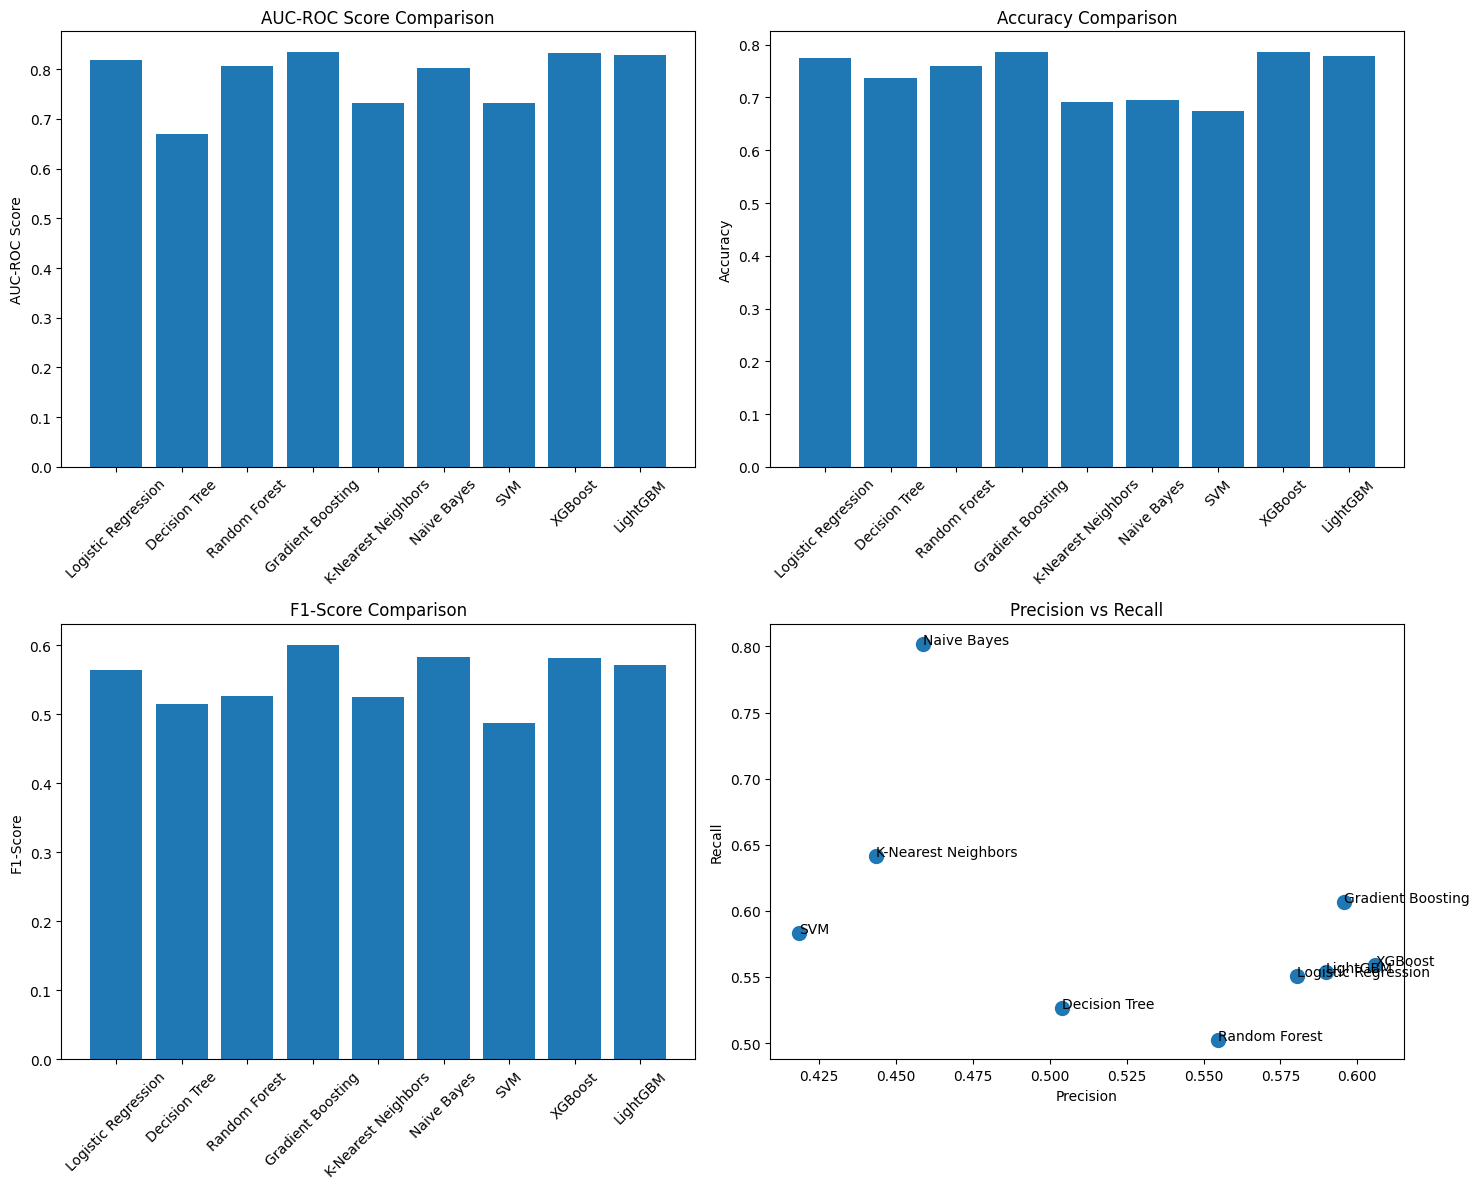


🏆 BEST PERFORMING MODEL: Gradient Boosting
AUC-ROC: 0.835
Accuracy: 0.786
F1-Score: 0.601


In [18]:
# Model Comparison and Visualization
print("=== MODEL COMPARISON ===")

# Sort models by AUC-ROC score
results_df_sorted = results_df.sort_values('AUC-ROC', ascending=False)
print("Models ranked by AUC-ROC score:")
print(results_df_sorted[['Model', 'AUC-ROC', 'Accuracy', 'F1-Score']].round(3))

# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# AUC-ROC comparison
axes[0, 0].bar(results_df['Model'], results_df['AUC-ROC'])
axes[0, 0].set_title('AUC-ROC Score Comparison')
axes[0, 0].set_ylabel('AUC-ROC Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Accuracy comparison
axes[0, 1].bar(results_df['Model'], results_df['Accuracy'])
axes[0, 1].set_title('Accuracy Comparison')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[1, 0].bar(results_df['Model'], results_df['F1-Score'])
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Precision vs Recall scatter plot
axes[1, 1].scatter(results_df['Precision'], results_df['Recall'], s=100)
for i, model in enumerate(results_df['Model']):
    axes[1, 1].annotate(model, (results_df['Precision'].iloc[i], results_df['Recall'].iloc[i]))
axes[1, 1].set_xlabel('Precision')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Precision vs Recall')

plt.tight_layout()
plt.show()

# Identify best performing model
best_model_name = results_df_sorted.iloc[0]['Model']
best_model = models_trained[best_model_name]
print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"AUC-ROC: {results_df_sorted.iloc[0]['AUC-ROC']:.3f}")
print(f"Accuracy: {results_df_sorted.iloc[0]['Accuracy']:.3f}")
print(f"F1-Score: {results_df_sorted.iloc[0]['F1-Score']:.3f}")


## 🔍 Step 19: Detailed Analysis of Best Model

Perform in-depth analysis of the best-performing model:
- **Classification Report**: Detailed precision, recall, F1-score
- **Confusion Matrix**: Visual representation of predictions
- **ROC Curve**: Model discrimination ability
- **Feature Importance**: Most influential features for predictions


=== DETAILED ANALYSIS OF Gradient Boosting ===

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1033
           1       0.60      0.61      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407


Confusion Matrix:
[[879 154]
 [147 227]]


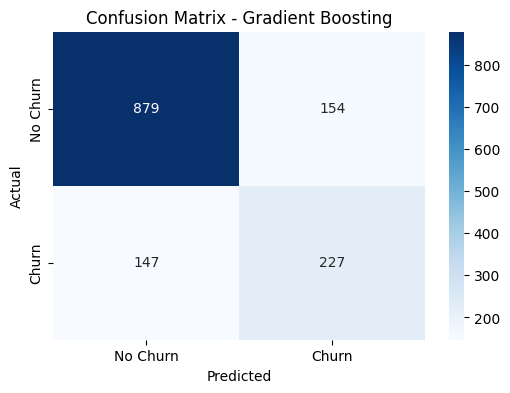

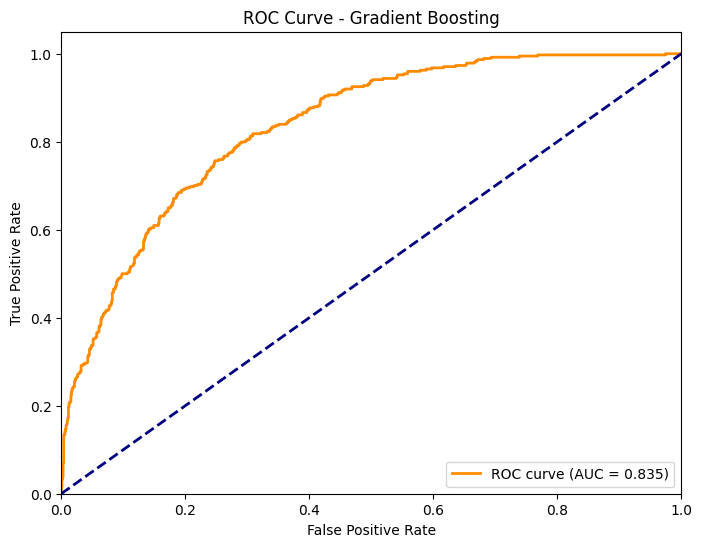


Top 10 Most Important Features for Gradient Boosting:
                           feature  importance
35         Contract_Month-to-month    0.396958
17               OnlineSecurity_No    0.101761
42  PaymentMethod_Electronic check    0.078726
2                     TotalCharges    0.060104
26                  TechSupport_No    0.059710
20                 OnlineBackup_No    0.034207
15     InternetService_Fiber optic    0.027954
19              OnlineSecurity_Yes    0.022980
44             tenure_group_1 - 12    0.022001
22                OnlineBackup_Yes    0.019708


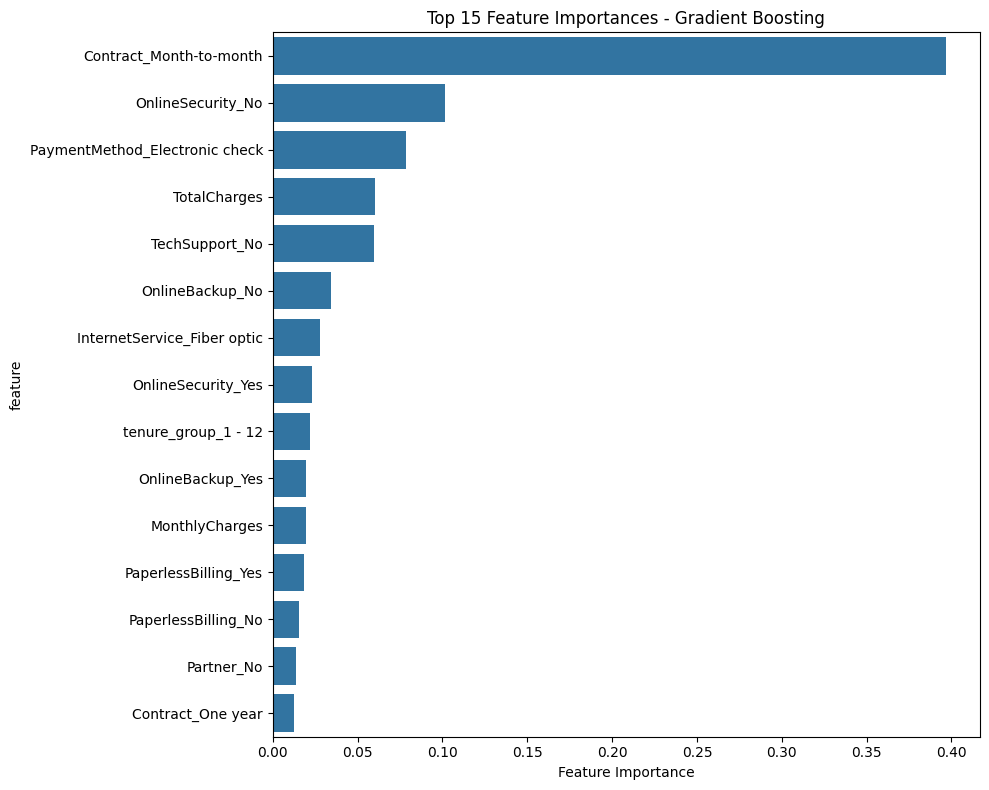

In [19]:
# Detailed Analysis of Best Model
print(f"=== DETAILED ANALYSIS OF {best_model_name} ===")

# Get predictions from best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_best = confusion_matrix(y_test, y_pred_best)
print(cm_best)

# Plot confusion matrix and ROC curve
plot_confusion_matrix(cm_best, best_model_name)
plot_roc_curve(y_test, y_pred_proba_best, best_model_name)

# Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print(f"\nTop 10 Most Important Features for {best_model_name}:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, 'coef_'):
    print(f"\nTop 10 Most Important Features for {best_model_name} (Logistic Regression):")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': best_model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature coefficients
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='coefficient', y='feature')
    plt.title(f'Top 15 Feature Coefficients - {best_model_name}')
    plt.xlabel('Coefficient Value')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()


## ⚙️ Step 20: Hyperparameter Tuning

Optimize the top 3 performing models using Grid Search Cross-Validation:
- **Grid Search**: Systematic parameter exploration
- **Cross-Validation**: 5-fold CV for robust parameter selection
- **AUC-ROC Scoring**: Optimize for the most important metric
- **Performance Comparison**: Original vs Tuned models


In [20]:
# Hyperparameter Tuning for Top Performing Models
print("=== HYPERPARAMETER TUNING ===")

# Get top 3 models for tuning
top_3_models = results_df_sorted.head(3)['Model'].tolist()
print(f"Tuning top 3 models: {top_3_models}")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Hyperparameter tuning results
tuned_results = []
tuned_models = {}

print("Starting hyperparameter tuning...")
for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        
        # Create base model
        if model_name == 'Random Forest':
            base_model = RandomForestClassifier(random_state=42)
        elif model_name == 'XGBoost':
            base_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
        elif model_name == 'LightGBM':
            base_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
        elif model_name == 'Gradient Boosting':
            base_model = GradientBoostingClassifier(random_state=42)
        
        # Grid Search with Cross Validation
        grid_search = GridSearchCV(
            base_model,
            param_grids[model_name],
            cv=5,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=0
        )
        
        # Fit the grid search
        grid_search.fit(X_train_smote, y_train_smote)
        
        # Get best model and results
        best_tuned_model = grid_search.best_estimator_
        tuned_models[f"{model_name}_Tuned"] = best_tuned_model
        
        # Evaluate tuned model
        results = evaluate_model(best_tuned_model, X_test, y_test, f"{model_name}_Tuned")
        tuned_results.append(results)
        
        print(f"Best parameters for {model_name}:")
        print(grid_search.best_params_)
        print(f"Best CV score: {grid_search.best_score_:.3f}")
        print(f"Test AUC: {results['AUC-ROC']:.3f}")

# Compare original vs tuned models
print("\n=== COMPARISON: ORIGINAL vs TUNED MODELS ===")
comparison_results = []

for model_name in top_3_models:
    # Original model results
    original_results = results_df[results_df['Model'] == model_name].iloc[0]
    comparison_results.append({
        'Model': f"{model_name} (Original)",
        'AUC-ROC': original_results['AUC-ROC'],
        'Accuracy': original_results['Accuracy'],
        'F1-Score': original_results['F1-Score']
    })
    
    # Tuned model results
    tuned_result = next(r for r in tuned_results if r['Model'] == f"{model_name}_Tuned")
    comparison_results.append({
        'Model': f"{model_name} (Tuned)",
        'AUC-ROC': tuned_result['AUC-ROC'],
        'Accuracy': tuned_result['Accuracy'],
        'F1-Score': tuned_result['F1-Score']
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.round(3))


=== HYPERPARAMETER TUNING ===
Tuning top 3 models: ['Gradient Boosting', 'XGBoost', 'LightGBM']
Starting hyperparameter tuning...

Tuning Gradient Boosting...
Best parameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV score: 0.943
Test AUC: 0.835

Tuning XGBoost...


/Users/rahulraj/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/rahulraj/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/rahulraj/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/rahulraj/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

Best parameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best CV score: 0.944
Test AUC: 0.830

Tuning LightGBM...
Best parameters for LightGBM:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 31}
Best CV score: 0.943
Test AUC: 0.829

=== COMPARISON: ORIGINAL vs TUNED MODELS ===
                          Model  AUC-ROC  Accuracy  F1-Score
0  Gradient Boosting (Original)    0.835     0.786     0.601
1     Gradient Boosting (Tuned)    0.835     0.790     0.600
2            XGBoost (Original)    0.832     0.786     0.581
3               XGBoost (Tuned)    0.830     0.780     0.573
4           LightGBM (Original)    0.828     0.779     0.571
5              LightGBM (Tuned)    0.829     0.786     0.588


## 💾 Step 21: Model Persistence and Pipeline Creation

Save the best model and create deployment-ready artifacts:
- **Model Serialization**: Save the best model using joblib
- **Preprocessing Pipeline**: Save SMOTE pipeline for new data
- **Feature Names**: Save feature list for input validation
- **Model Metadata**: Store performance metrics and configuration


In [23]:
# Model Persistence and Pipeline Creation
print("=== MODEL PERSISTENCE ===")

import joblib
import pickle
from sklearn.pipeline import Pipeline

# Find the best performing model (original or tuned)
all_results = []

# Add baseline results
for _, row in results_df.iterrows():
    all_results.append(row.to_dict())

# Add tuned results (if they exist)
if 'tuned_results' in locals() and tuned_results:
    for result in tuned_results:
        all_results.append(result)

# Create DataFrame from results
if all_results:
    final_results_df = pd.DataFrame(all_results)
    best_final_model_name = final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'Model']
    
    # Try to get the model from either dictionary
    best_final_model = None
    if best_final_model_name in models_trained:
        best_final_model = models_trained[best_final_model_name]
    elif 'tuned_models' in locals() and best_final_model_name in tuned_models:
        best_final_model = tuned_models[best_final_model_name]
    
    print(f"🏆 FINAL BEST MODEL: {best_final_model_name}")
    print(f"AUC-ROC: {final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'AUC-ROC']:.3f}")
else:
    # Fallback to baseline models only
    best_final_model_name = results_df.loc[results_df['AUC-ROC'].idxmax(), 'Model']
    best_final_model = models_trained[best_final_model_name]
    final_results_df = results_df.copy()
    print(f"🏆 BEST MODEL (Baseline): {best_final_model_name}")
    print(f"AUC-ROC: {results_df.loc[results_df['AUC-ROC'].idxmax(), 'AUC-ROC']:.3f}")

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42))
])

# Save the best model
model_filename = f'best_churn_model_{best_final_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_final_model, model_filename)
print(f"✅ Model saved as: {model_filename}")

# Save preprocessing pipeline
preprocessing_filename = 'churn_preprocessing_pipeline.pkl'
joblib.dump(preprocessing_pipeline, preprocessing_filename)
print(f"✅ Preprocessing pipeline saved as: {preprocessing_filename}")

# Save feature names
feature_names = list(X.columns)
feature_filename = 'feature_names.pkl'
with open(feature_filename, 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✅ Feature names saved as: {feature_filename}")

# Save model metadata
model_metadata = {
    'model_name': best_final_model_name,
    'model_type': type(best_final_model).__name__,
    'features': feature_names,
    'training_samples': len(X_train_smote),
    'test_samples': len(X_test),
    'performance_metrics': {
        'auc_roc': float(final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'AUC-ROC']),
        'accuracy': float(final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'Accuracy']),
        'precision': float(final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'Precision']),
        'recall': float(final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'Recall']),
        'f1_score': float(final_results_df.loc[final_results_df['AUC-ROC'].idxmax(), 'F1-Score'])
    },
    'data_info': {
        'total_samples': len(df),
        'features_count': len(feature_names),
        'class_distribution': df['Churn'].value_counts().to_dict()
    }
}

metadata_filename = 'model_metadata.pkl'
with open(metadata_filename, 'wb') as f:
    pickle.dump(model_metadata, f)
print(f"✅ Model metadata saved as: {metadata_filename}")

print(f"\n📊 MODEL METADATA:")
print(f"Model: {model_metadata['model_name']}")
print(f"Type: {model_metadata['model_type']}")
print(f"Features: {model_metadata['data_info']['features_count']}")
print(f"AUC-ROC: {model_metadata['performance_metrics']['auc_roc']:.3f}")
print(f"Accuracy: {model_metadata['performance_metrics']['accuracy']:.3f}")
print(f"F1-Score: {model_metadata['performance_metrics']['f1_score']:.3f}")


=== MODEL PERSISTENCE ===
🏆 FINAL BEST MODEL: Gradient Boosting_Tuned
AUC-ROC: 0.835
✅ Model saved as: best_churn_model_gradient_boosting_tuned.pkl
✅ Preprocessing pipeline saved as: churn_preprocessing_pipeline.pkl
✅ Feature names saved as: feature_names.pkl
✅ Model metadata saved as: model_metadata.pkl

📊 MODEL METADATA:
Model: Gradient Boosting_Tuned
Type: GradientBoostingClassifier
Features: 50
AUC-ROC: 0.835
Accuracy: 0.790
F1-Score: 0.600


## 🎯 Step 22: Threshold Optimization for Business Metrics

Optimize the decision threshold to maximize F1-Score, which balances precision and recall:
- **Precision-Recall Curve**: Find optimal threshold
- **F1-Score Maximization**: Balance between precision and recall
- **Business Impact**: Lower threshold captures more potential churners
- **Performance Update**: Re-evaluate model with optimized threshold



=== THRESHOLD OPTIMIZATION ===
---------------------------------------------------
✅ Optimal Threshold for Best F1 = 0.347
🔹 Best F1-Score = 0.626
---------------------------------------------------

📊 Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1033
           1       0.53      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407

📉 Confusion Matrix:
[[786 247]
 [ 91 283]]


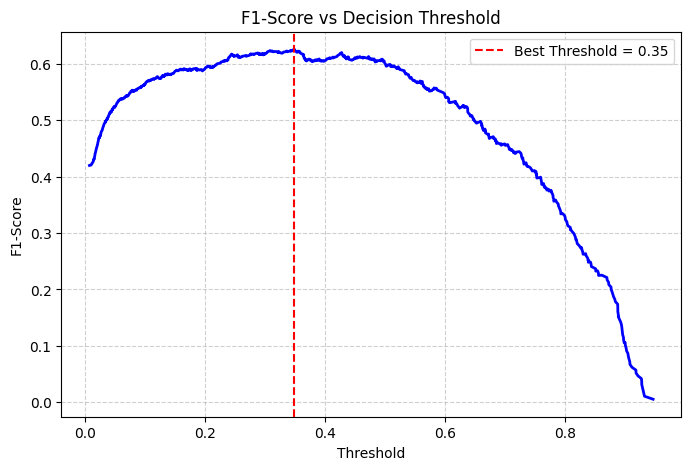

✅ Updated model metadata saved with best threshold (0.347)


In [25]:
# ---------------------------------------------------------
# 🔧 OPTIMIZE DECISION THRESHOLD FOR BEST F1-SCORE
# ---------------------------------------------------------
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

print("\n=== THRESHOLD OPTIMIZATION ===")

# Generate predicted probabilities on the test set
y_proba = best_final_model.predict_proba(X_test)[:, 1]

# Compute precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find the best threshold index
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Display best threshold and F1
print("---------------------------------------------------")
print(f"✅ Optimal Threshold for Best F1 = {best_threshold:.3f}")
print(f"🔹 Best F1-Score = {best_f1:.3f}")
print("---------------------------------------------------")

# Apply threshold
y_pred_opt = (y_proba >= best_threshold).astype(int)

# Show updated performance
print("\n📊 Classification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_opt))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_opt))

# Plot F1 vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores[:-1], linewidth=2, color='blue')
plt.axvline(best_threshold, color='red', linestyle='--', label=f"Best Threshold = {best_threshold:.2f}")
plt.title("F1-Score vs Decision Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Save the best threshold to metadata for future use
model_metadata['best_threshold'] = float(best_threshold)
with open(metadata_filename, 'wb') as f:
    pickle.dump(model_metadata, f)

print(f"✅ Updated model metadata saved with best threshold ({best_threshold:.3f})")
